# Prevendo a Resistência do Concreto

## Introdução

O concreto é o material mais importante da engenharia civil, sendo material componente de estruturas de diversos tipos de edificações, pontes, fundações, entre outras. Portanto, é imprescindível o controle de qualidade do concreto utilizado nessas obras. Esse controle é feito por meio de uma série de ensaios, como os de abatimento, espalhamento e, principalmente, os ensaios de resistência do concreto.

A resistência à compressão do concreto indica a qual tensão o concreto tem capacidade de resistir. Essa tensão é a resultante da divisão entre a força e a área em que ela atuará.

A resistência à compressão do concreto é uma função altamente não linear da idade e dos ingredientes. Esses ingredientes incluem cimento, escória, cinzas volantes, água, superplastificante, agregado grosso e agregado fino. 

O dataset usado foi obtido do site UCI - Machine Learning Repository, um dos mais fomosos repositórios de dados para machine learning. 

Link do dataset: <a hfe="https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength" target="_blanck">Concrete Compressive Strength Data Set</a>

## Objetivo:

1. Criar modelos de regressão pra predizer o valor da resistência do concreto;

2. Determinar qual fatores (recursos) mais afetam o aumento da resistência do concreto.


## Importando as bibliotecas e os Dados

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor

import warnings  # Ignora avisos de 'futurewarning'
warnings.simplefilter(action='ignore', category=FutureWarning)

In [91]:
# Importando os dados
df = pd.read_excel("Concrete_Data.xls")
df.head() 

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [92]:
# Alterando o nome das colunas
df.columns = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarse_agg', 'fine_agg', 'age', 'strength']
df.head()

,cement,slag,flyash,water,superplasticizer,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
print(f"A forma do dataset é: {df.shape}, no qual existem {df.shape[0]} linhas e {df.shape[1]} colunas.")

A forma do dataset é: (1030, 9), no qual existem 1030 linhas e 9 colunas.


In [5]:
# Exibe informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_agg        1030 non-null   float64
 6   fine_agg          1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Temos as 8 colunas com dados numéricos do tipo float e uma coluna com int. Parece não haver valores nulos em nenhuma das colunas, pois a quantidade de dados válidos em cada coluna é igual a quantidade de linhas do dataset.

## Conferindo se existem outliers

O primeiro procedimento que temos que fazer para rgaranti um bom desempenho do nosso modelo é retirar os os valores de dados que estão distantes dos outros valores de dados, os chamados outliers. 

In [6]:
# Exibe as estatísticas do dataset
df_summary = df.describe()
df_summary

,cement,slag,flyash,water,superplasticizer,coarse_agg,fine_agg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Vemos que as colunas slag, flyash e superplasticizer apresentam valores zeros. Esses valores serão substituídos pelo valor médio de cada coluna.

Vamos fazer os gráficos do tipo boxplot para identificar os outliers.

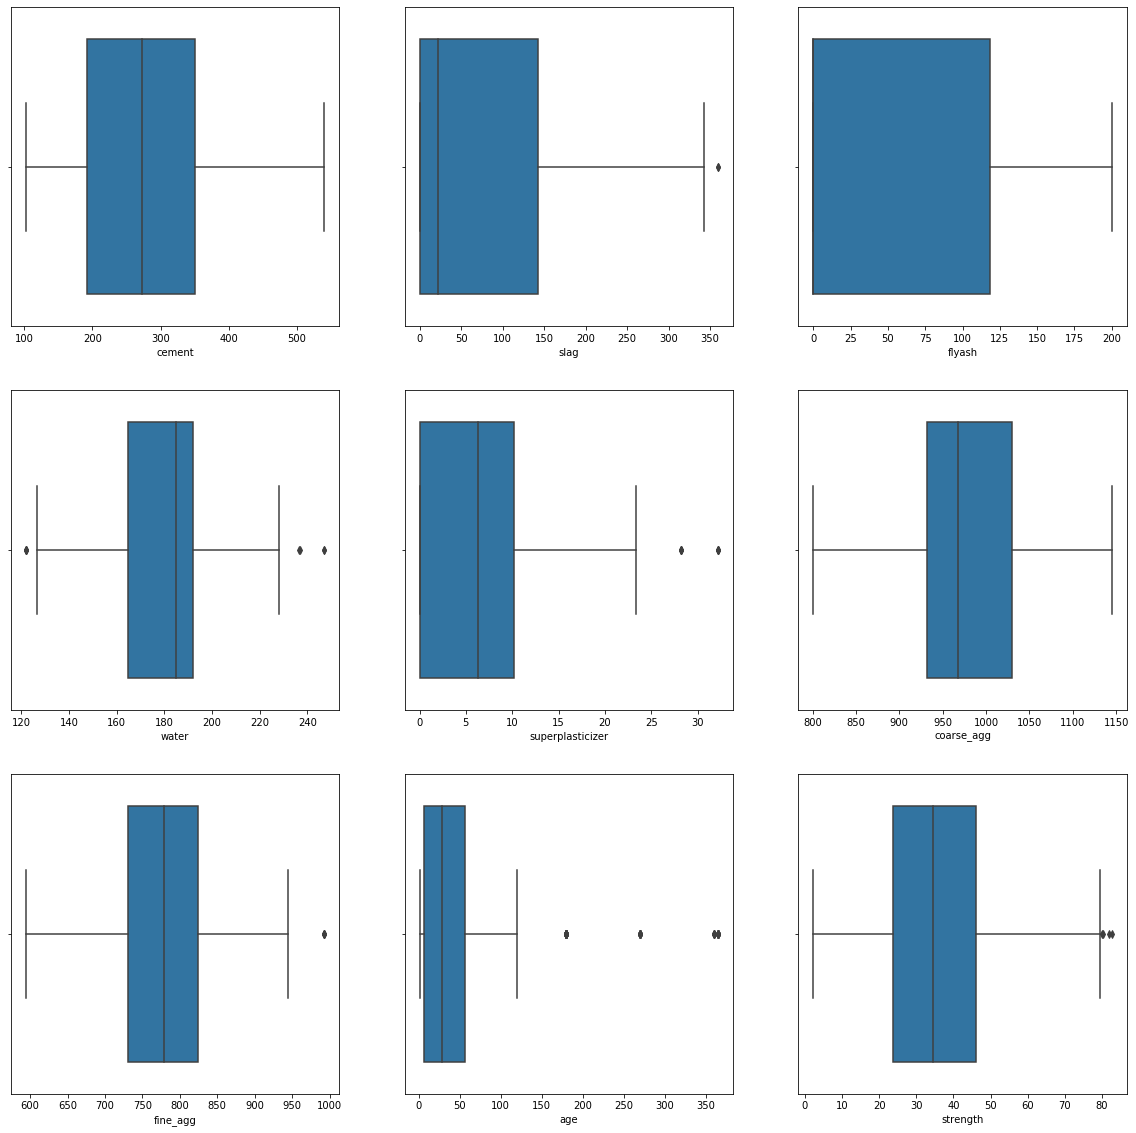

In [7]:
# Desenha o boxplot 
fig, axes = plt.subplots(3, 3, figsize = (20,20));
col_cnt = 0
col_names = df.columns.tolist()
for r in range(3):
    for c in range(3):
        try:
            sns.boxplot(df[col_names[col_cnt]], ax=axes[r][c], orient="h")
            col_cnt += 1
        except:
            pass

Existem alguns outliers nas colunas slag, water, superplasticizer, fine_agg e age.

Se removessemos as linhas com outliers estaríamos removendo muitos dos dados. Portanto, também iremos substituí-los pelos valores médios de cada coluna. 

In [94]:
# Lista com as colunas com outliers
outlier_cols = ["slag", "water", "superplasticizer", "fine_agg", "age"]

def cap_outliers(df, col):
    ''' Essa função localiza os outliers e substituí pelo valor médio '''
    
    q1 = df_summary[col].loc["25%"] 
    q3 = df_summary[col].loc["75%"] 
    iqr = q3 - q1 
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df.loc[df[col] < lower_bound, col] = df_summary[col].loc["mean"] 
    df.loc[df[col] > upper_bound, col] = df_summary[col].loc["mean"]
    return df

for col in outlier_cols:
    df = cap_outliers(df, col)
  

## Engenharia de Recursos

Podemos criar dois aributos compostos que estão diretamente relacionados:

* cement - water: A água em excesso no cimento reduz a resistência do concreto e aumenta a porosidade. Vamos então tirar a razão entre essas variáveis.

* coarse_agg - fine_agg: A compatibilidade entre cimento e agregados (grosso e fino) também é muito importante porque, quando incompatíveis, podem gerar uma reação interna de expansão no concreto, ocasionando fissuras e até trincas. Portanto, vamos tirar o valor médio entre esses variáveis.

In [95]:
# Faz uma cópia dos dataset
df_copy = df.copy()

# Cria novas variáveis compostas
df_copy["cement_water_ratio"] = df_copy["cement"]/df_copy["water"]
df_copy["average_agg"] = (df_copy["coarse_agg"] + df_copy["fine_agg"])/2
# Deleta as colunas antigas
df_copy.drop(columns=["cement", "water", "coarse_agg", "fine_agg"], inplace=True)


## Criando os Modelos

Aqui começamos a desenvolver os modelos de regressão. Os modelos usados são:
* Multiple Linear Regression : é um método usado para modelar a relação linear entre uma variável dependente (y) e uma ou mais variáveis independentes (x) de multivariáveis. O modelo é baseado em mínimos quadrados ordinários (MQO), o modelo é ajustado de forma que a soma dos quadrados das diferenças dos valores observados e previstos seja minimizada.

* Support Vector Regression (SVR): A ideia por trás do modelo é basicamente considerar os pontos que estão dentro da linha limite de decisão. Nossa linha de melhor ajuste é o hiperplano que possui um número máximo de pontos. 

* Polynominal Regression: E uma forma de análise de regressão na qual a relação entre a variável independente (x) e a variável dependente (y) é modelada como um polinômio de enésimo grau em x. 

* Random Forest: É construídos a partir de modelos de árvore de decisão. As árvores são adicionadas uma de cada vez ao conjunto e ajustadas para corrigir os erros de previsão feitos pelos modelos anteriores. 

* XGBoost Regression: É uma implementação eficiente de código aberto do algoritmo de 'gradient boosting'. O modelo é ajustado usando qualquer função de perda diferenciável arbitrária e algoritmo de otimização de gradiente descendente, minimizando o gradiente de perda conforme o modelo é ajustado.

In [96]:
# Seleciona a coluna alvo
target_col = ["strength"]
# Pega os nomes das colunas
col_names = df_copy.columns.to_list()
# Exclui o nome da coluna alvo
col_names.remove(target_col[0])

In [131]:
# Separa os dados em recursos (X) e alvo (y)
X = df_copy[col_names] 
y = df_copy[target_col]

# Separa o dataset em conjunto de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)

Vamos definir uma única função que seja capaz de avaliar cada modelo estudado da seguinte maneira:

1. Gerando um gráfico com os dados reais e os valores previsto pelo modelo;

2. Gráfico de barras com a quantidade de cada coeficiente da regressão;

3. Tabela com as métricas: Raiz do erro quadrático médio (RMSE), coeficiente de determinação ($R^2$) e o valor médio do validação cruzada (CV-mean).

In [158]:
evaluation = {"Metrics" : ['Root Mean Squared Error (RMSE)', 'R2 score', 'CV-mean']}
def evaluate_model(name, X_train, y_train, X_test, y_test, types, alg, plot=True):
    global evaluation, pred #defini os parâmetros como globais
    
    alg.fit(X_train, y_train.values.ravel()) # ajusta o modelo com os dados de treino

    # Calcula os coeficientes da regressão e exibe em um gráfico de barras 
    print(f"Score: {alg.score(X_test, y_test.values.ravel())}")
    if plot:
        fig, axes = plt.subplots(2, 1, figsize=(20, 10))
        try:
            if types == "Coefs":
                print(f"Intercept: {alg.intercept_}")
                try:
                    coefs = pd.DataFrame({"coefs" : alg.coef_, "col" : col_names})
                except:
                    coefs = pd.DataFrame({"coefs" : alg.coef_[0], "col" : col_names})
                sns.barplot(x="col", y="coefs", data=coefs, ax=axes[1])
                axes[1].set_title("Valores dos Coeficientes para os Recursos")
            else:
                features = pd.DataFrame({"features" : alg.feature_importances_, "col" : col_names})
                sns.barplot(x="col", y="features", data=features, ax=axes[1])
                axes[1].set_title("Valores dos Coeficientes para os Recursos")
        except:
            pass
    else:
        plt.figure(figsize=(20,5))
        axes = [None]

    # Predição com os dados de teste
    pred = alg.predict(X_test)
    # Calcula as métricas
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    r2 = r2_score(y_test, pred)

    # Cria um dataframe para salvar os valores das métricas de cada modelo
    p = pd.DataFrame(pred, columns=["Resistência"])
    p["Tipo"] = "Predição"
    p["Valores"] = list(range(p.shape[0]))
    t = y_test.copy()
    t = t.reset_index().set_index("index")
    t.columns = ["Resistência"]
    t["Tipo"] = "Real"
    t = t[t["Resistência"] != "Real"]
    t["Valores"] = list(range(p.shape[0]))
    x = pd.concat([p,t], axis=0).reset_index()

    # Gráfico de comparação entre os dados
    sns.lineplot(x="Valores", y="Resistência", hue="Tipo", data=x, markers=["o", "o"], style="Tipo", ax=axes[0])
    
    
    # Avalia a métrica por validação cruzada
    cv = cross_val_score(alg, X, y.values.ravel(), cv=10)
    cv_mean = cv.ravel().mean()

    # Tabela com os valors das métricas para cada modelo
    evaluation[name] = [rmse, r2, cv_mean]
    df_ev = pd.DataFrame(evaluation)
    plt.show()

    return df_ev

## Multiple Linear Regression

Score: 0.7361542094766669
Intercept: 1.3742984766400212


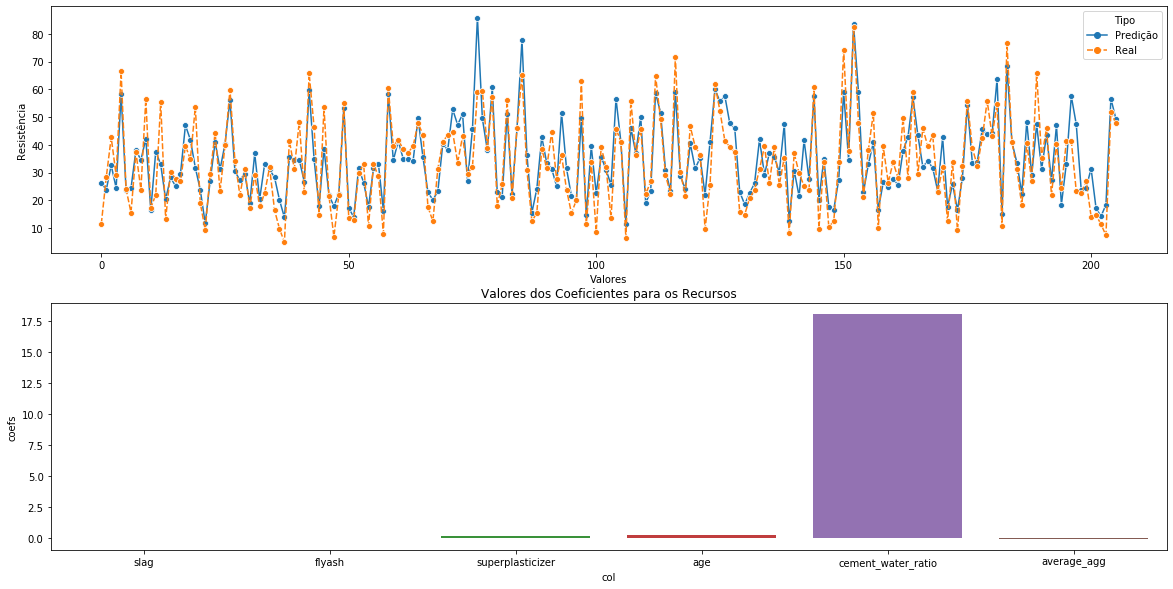

,Multiple Regression
Metrics,
Root Mean Squared Error (RMSE),8.216059
R2 score,0.736154
CV-mean,0.512140


In [159]:
lr = LinearRegression()
evaluation = evaluate_model("Multiple Regression", X_train, y_train, X_test, y_test, "Coefs", lr)
evaluation.set_index("Metrics")

Obtemos um valor de $R^2 = 0.73$ e vemos que os valores preditos não tem muita semelhança com os reais no primeiro gráfico.

Para o modelo regressão linear, a coluna cement_water_ratio possui o maior valor de coeficiente que o resto dos recursos, o que significa que possui o maior peso na predição da resistência do concreto. 

## Suport Vector Regressor

Score: 0.7305497607663237
Intercept: [14.81937634]


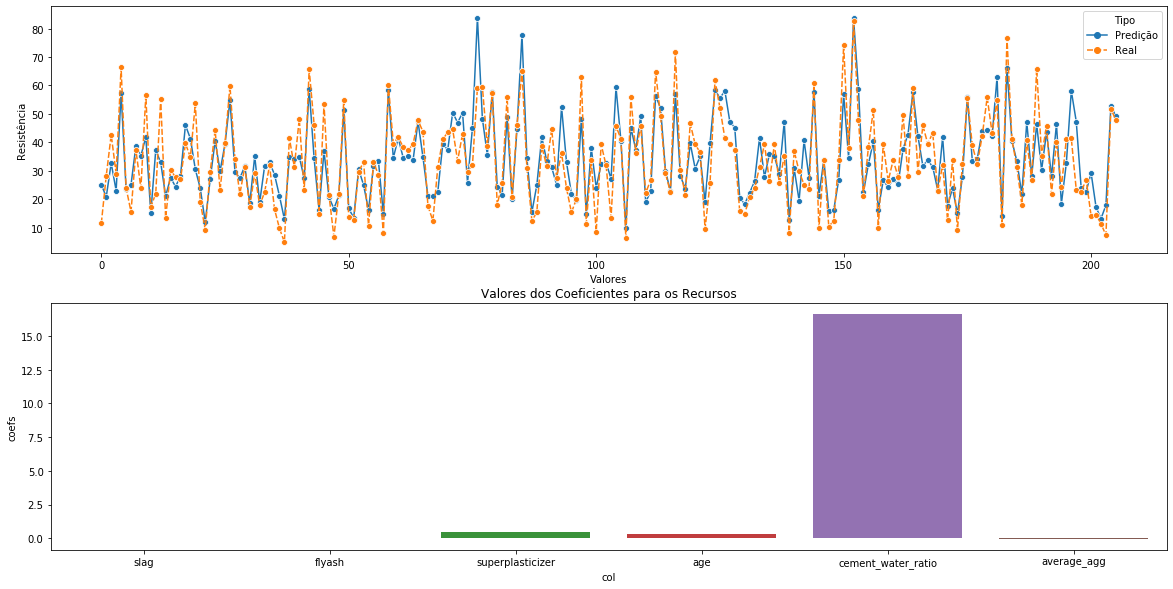

,Multiple Regression,Support Vector Regression
Metrics,,
Root Mean Squared Error (RMSE),8.216059,8.302861
R2 score,0.736154,0.730550
CV-mean,0.512140,0.525380


In [160]:
svr = SVR(C=1, kernel="linear")
evaluation = evaluate_model("Support Vector Regression", X_train, y_train, X_test, y_test, "Coefs", svr)
evaluation.set_index("Metrics")

Para o SVR, também obtemos um valor de $R^2 = 0.73$ e vemos, mais uma vez, que os valores previtos não tem muita semelhança com os reais no primeiro gráfico. 

O que vemos aqui é que mesmo usando um algoritmo mais sofisticado, um modelo linear não é adequado para representar os dados.

## Polynomial Regression

Score: 0.8516595467906038


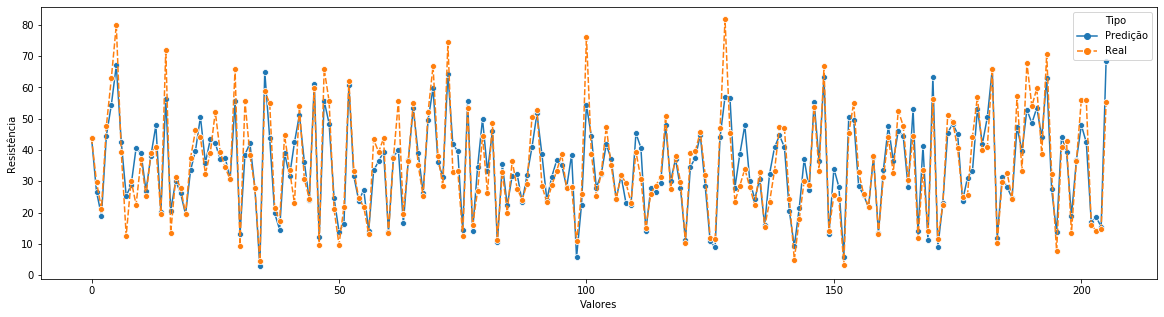

,Multiple Regression,Support Vector Regression,Polynomial Regression
Metrics,,,
Root Mean Squared Error (RMSE),8.216059,8.302861,6.24106
R2 score,0.736154,0.730550,0.85166
CV-mean,0.512140,0.525380,0.51214


In [161]:
# ajusta os dados da variável x para um polinômio de grau 3
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size = 0.2, random_state = 13)


plr = LinearRegression()
evaluation = evaluate_model("Polynomial Regression", X_train_poly, y_train_poly, X_test_poly, y_test_poly,'Coefs', plr,plot=False)
evaluation.set_index("Metrics")

Agora, usando um polinômio e grau 3, temos um $R^2 =0.85$ e uma melhor semelhança entre os valores previtos e os reais.

## Random Forest

Score: 0.8979553408765831


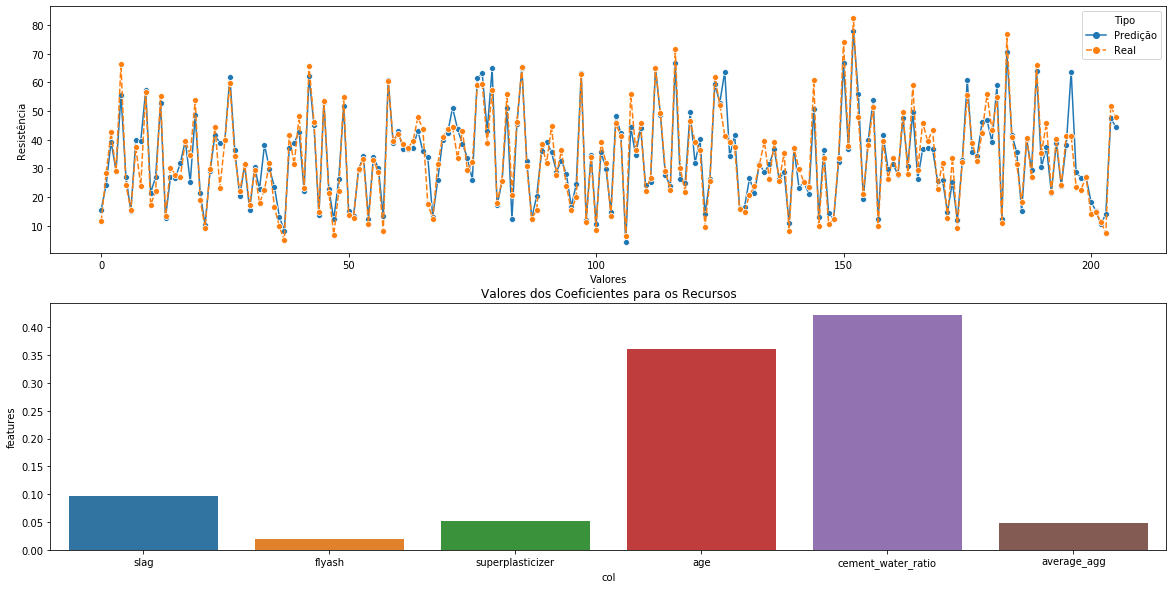

,Multiple Regression,Support Vector Regression,Polynomial Regression,Random Forest Regression
Metrics,,,,
Root Mean Squared Error (RMSE),8.216059,8.302861,6.24106,5.109561
R2 score,0.736154,0.730550,0.85166,0.897955
CV-mean,0.512140,0.525380,0.51214,0.783614


In [162]:
rfr = RandomForestRegressor()
evaluation = evaluate_model("Random Forest Regression", train_X, train_y, test_X, test_y, "Features", rfr)
evaluation.set_index("Metrics")

Usando o Random Forest, conseguimos um $R^2 =0.89$ e um aumento significativo na precisão do dados preditos.

É claramente visível que as variáveis que possuem mais importância para um melhor resultado da resistência são o cement_water_ratio e age. 

## XGBoost

Score: 0.916837085423248


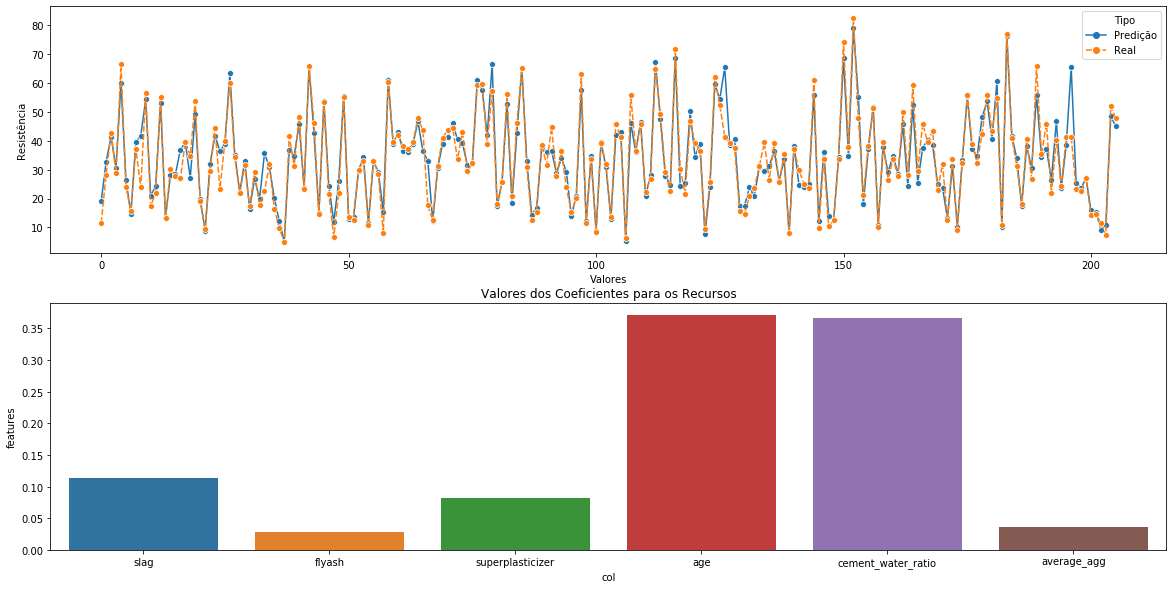

,Multiple Regression,Support Vector Regression,Polynomial Regression,Random Forest Regression,XGBoost
Metrics,,,,,
Root Mean Squared Error (RMSE),8.216059,8.302861,6.24106,5.109561,4.612680
R2 score,0.736154,0.730550,0.85166,0.897955,0.916837
CV-mean,0.512140,0.525380,0.51214,0.783614,0.790548


In [163]:
xgc = XGBRegressor(n_estimators=100,max_depth=4,gamma=0.01,booster='gbtree')
evaluation = evaluate_model("XGBoost", train_X, train_y, test_X, test_y, "Features", xgc)
evaluation.set_index("Metrics")

Conseguimos agora uma pontuação de $R^2 = 0.91% e um semelhança entre os valores preditos e os reais visivelmente melhor.

Para um modelo com melhores resultados, tanto cement_water_ratio quanto age são variáveis igualmente importantes para predição da resistência.

## Conclusão

Obtemos um modelo, o XGBoostRegression, com uma boa  capacidade de prever a resistência do concreto

Para essa tarefa, tanto a razão cimento/água quanto a idade do concreto são as mais impotantes.

Por fim, mostramos uma tabela onde se é possível comparar numericamente os valores reais e resistência do concreto com os valores previtos pelo modelo XGBoost.

In [184]:
best_pred = xgc.predict(test_X)

result = pd.DataFrame()
result["Resistência_Real"] = test_y
result["Melhor_Predição"] = best_pred
result

,Resistência_Real,Melhor_Predição
774,11.465986,19.053761
21,28.237490,32.685658
1009,42.644091,41.364563
941,28.937997,30.637245
333,66.424118,60.121315
...,...,...
544,14.596896,15.428015
665,11.392212,9.233214
289,7.315340,10.979827
720,51.863764,48.409779
